# MA933 Assignment 1

*Student ID: 2260253*

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q1(c)**

In [2]:
def SRWclosed(p, tmax, length, Nsim, init_state):
    # function simulates a simple random walk with closed boundary conditions, taking in parameters:
    # p - probability of jumping up a step
    # tmax - number of time steps to simulate each realization 
    # length - number of states in S = {1, 2, ..., length}
    # Nsim - number of realizations 
    # init_state - initial starting point (must lie in S)
    q = 1 - p
    Y = np.zeros((Nsim,tmax+1)) # matrix holding simulations with Nsim rows
    Y[:,0] = init_state # first column contains starting point init_state at t = 0
    
    for k in range(Nsim): # for Nsim realizations...
        for j in range(tmax): # for tmax time steps...
            r = np.random.rand() # random number generator in Uniform(0,1)
            
            # closed boundary condition: p(1,1) = q
            if Y[k,j] == 1:
                if r<p:
                    x = 1
                else:
                    x = 0
            
            # closed boundary condition: p(length,length) = p
            elif Y[k,j] == length:
                if r<p:
                    x = 0
                else:
                    x = -1
                    
            # at other states, we jump up with probability p and jump down with probability q
            else:        
                if r<p:
                    x = 1
                else:
                    x = -1
    
            Y[k,j+1] = Y[k,j] + x # state at time t + 1 is updated by x
        
    return Y

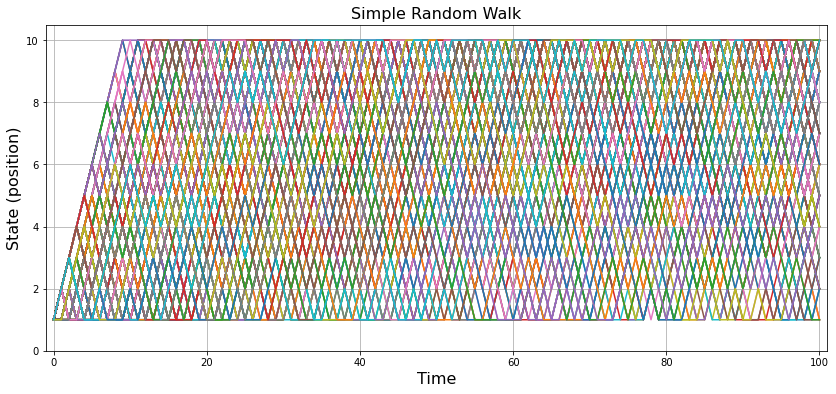

In [3]:
#Inputs
p = 0.6
tmax = 100
L = 10
y_0 = 1
N = 500

Yc = SRWclosed(p, tmax, L, N, y_0)

#plot the output matrix Y for a sanity check
plt.figure(figsize = (14,6))
for k in range(N):
    plt.plot(range(tmax+1), Yc[k,:])
     
plt.xlabel('Time',fontsize=16)
plt.ylabel('State (position)',fontsize=16)
plt.title('Simple Random Walk',fontsize=16)

plt.xlim([-1, tmax+1])
plt.ylim([0, 10.5])
plt.grid()

/home/ndoyle/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


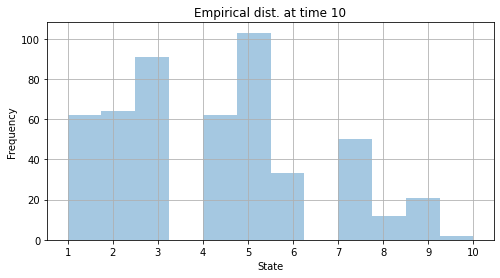

In [4]:
# empirical distribution at time 10

t1 = 10
plt.figure(figsize = (8,4))
plt.title('Empirical dist. at time 10')
plt.grid()
sns.distplot(Yc[:,t1],kde=False)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

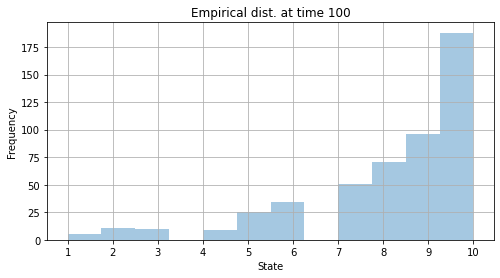

In [5]:
# empirical distribution at time 100

t2 = 100
plt.figure(figsize = (8,4))
plt.title('Empirical dist. at time 100')
plt.grid()
sns.distplot(Yc[:,t2],kde=False)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

Compare with the theoretical stationary distribution from (a) and comment on your results

__answer__

**Q1(d)**

In [6]:
#Inputs
p = 0.6
L = 10
y_0 = 1
N = 1

Yd_50 = SRWclosed(p, 50, L, N, y_0) # run 1 realization for 50 time steps
Yd_500 = SRWclosed(p, 500, L, N, y_0) # run 1 realization for 500 time steps

In [7]:
# record the proportion of each state occuring in Yd_50 and Yd_500 respectively
counts_50 = np.zeros((L))
counts_50[0] = -1/50 # want to exclude the t=0 starting point
for i in range(len(counts_50)):
    counts_50[i] += np.count_nonzero(Yd_50 == i+1)/50
    
counts_500 = np.zeros((L))
counts_500[0] = -1/500
for i in range(len(counts_500)):
    counts_500[i] += np.count_nonzero(Yd_500 == i+1)/500

print(counts_50)
print(np.sum(counts_50))

[0.14 0.08 0.1  0.1  0.1  0.16 0.2  0.1  0.02 0.  ]
1.0


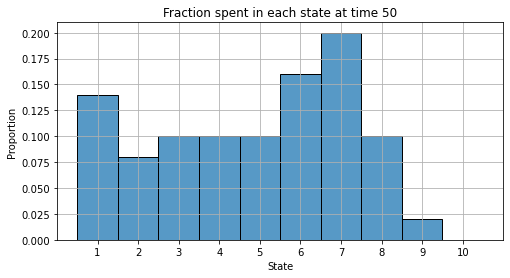

In [8]:
bins = [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize = (8,4))
plt.title('Fraction spent in each state at time 50')
plt.grid()
sns.histplot(x=bins, weights=counts_50, discrete=True)
plt.xticks(bins)
plt.xlabel("State")
plt.ylabel("Proportion")
plt.show()

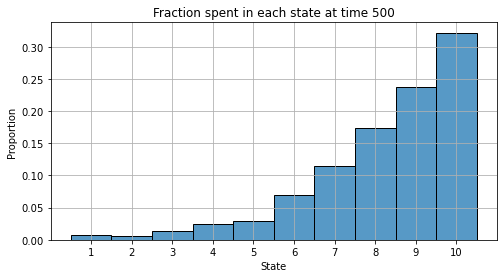

In [9]:
plt.figure(figsize = (8,4))
plt.title('Fraction spent in each state at time 500')
plt.grid()
sns.histplot(x=bins, weights=counts_500, discrete=True)
plt.xticks(bins)
plt.xlabel("State")
plt.ylabel("Proportion")
plt.show()

Compare to the stationary distribution and comment on your results

**Q2(c)**

In [10]:
#solving the system of linear equations for x = (a b c)
import numpy.linalg as la

A = np.array([[1,1,1],[1,-2,-5],[1,4,25]])
b = np.array([1,-2,5])

x = la.solve(A,b)
x

array([0.05555556, 0.88888889, 0.05555556])

**Q3(c)**

In [113]:
#function to sort arrays using the insertion method 
def SortINSR(a):
    if type(a) == np.ndarray or type(a) == list:
        n = len(a)
        if n == 1:
            return a #re-return the array if it contains only one element
        else:
            for j in range(1,n): #for each iteration we focus on moving the a[j] element of the original array
                k = j
                while a[k] < a[k-1] and k > 0: #iterates until a[k] is in suitable position or at the beginning
                    hold = a[k-1] #placeholder variable to store a[k-1] before replacement
                    a[k-1] = a[k] #a[k] is now smaller value
                    a[k] = hold #a[k] is now larger value
                    k -= 1 #move index down the array to compare with next smaller element
        
            return a #array has been sorted
    else:
        return 'Error: argument must be a list or array'

In [155]:
def Polya(k, tmax, gamma, f):
    # function which simulates the generalised Polya urn Markov Chain, taking parameters:
    # k: number of distinct ball colours
    # tmax: time to simulate
    # gamma: reinforcement parameter
    # f: k-sized array of fitness parameters across k balls
    # Assumes we simulate for 1 realization

    X = np.ones((k,tmax+1)) # matrix which stores simulation with time progressing along columns
    X[:,0] = np.ones(k) # initial condition
        
    for n in range(tmax):
        
        # retrieve current state X(n) and define the transition probabilities
        current_state = X[:,n]
        ps = (f*X[:,n]**gamma)/(np.sum(f*current_state**gamma))

        # r defines the index of ball k which we choose randomly according to probability ps
        r = np.random.choice(range(k),replace=True,p = ps)

        # update next state X(n+1)
        X[:,n+1] = X[:,n]
        X[r,n+1] += 1
        
    return X

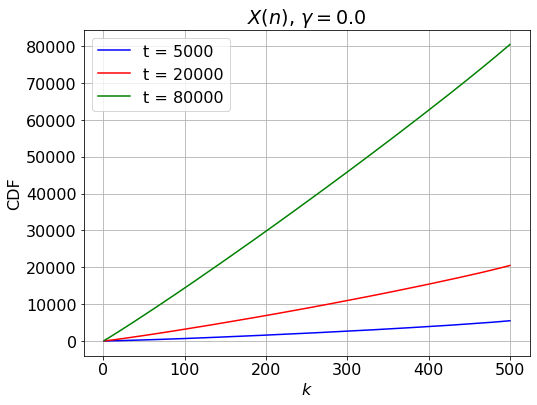

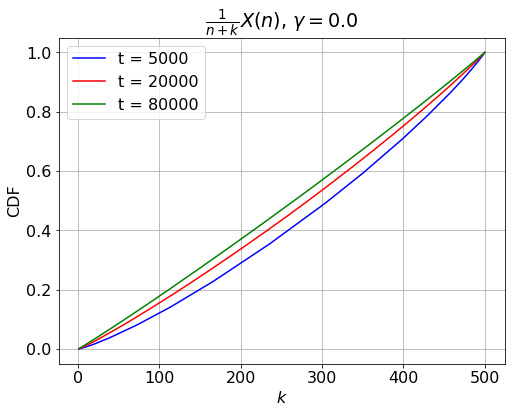

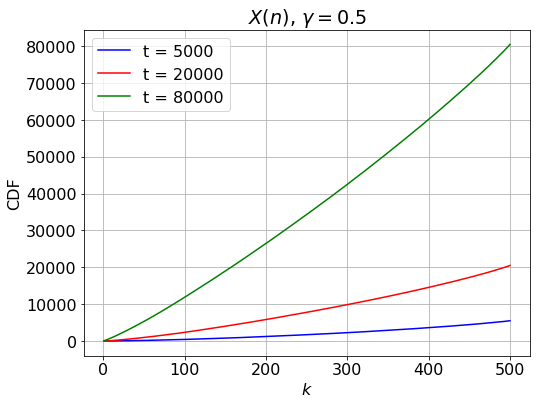

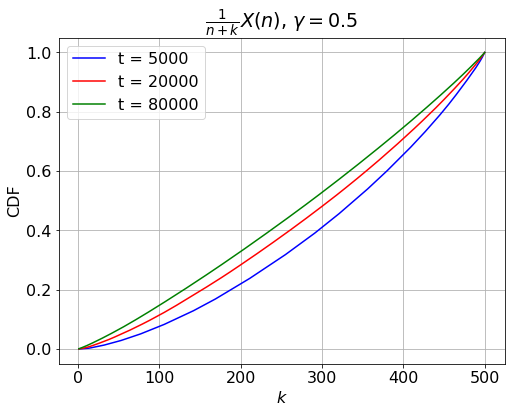

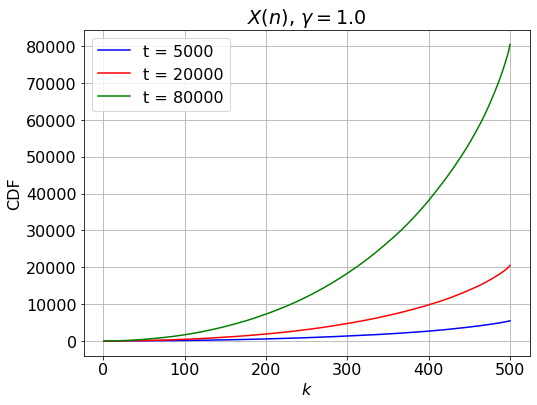

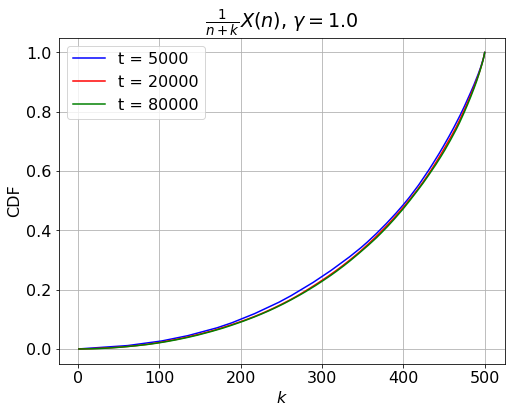

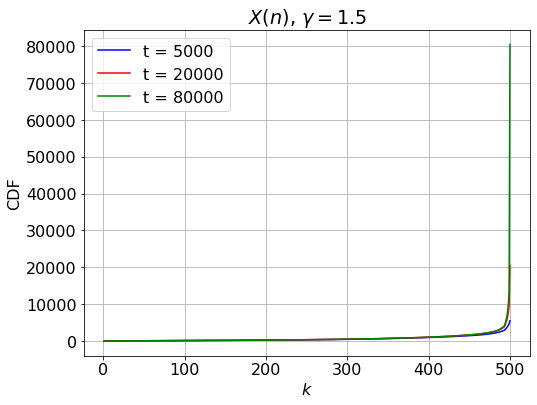

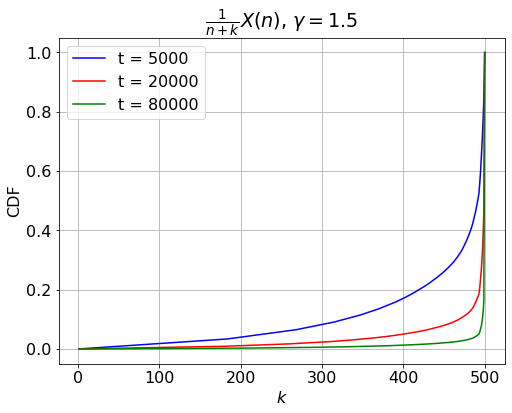

In [156]:
#plotting
plt.rcParams.update({'font.size': 16})

# Inputs
k = 500
t1 = 5000
t2 = 20000
t3 = 80000
ts = np.array([t1, t2, t3])
gammas = np.array([0, 0.5, 1, 1.5])
f = np.ones(k)
plotcols = ['b', 'r', 'g']

# for loop will run four simulations of the Polya urn MC for varying gamma to end time t3
# from these we extract X(t1), X(t2) and X(t3) and plot the empirical CDF for both X(n) 
# and normalised 1/(n+k) X(n) on two seperate figures.
# To obtain the CDF we sort X(n) in ascending order using the insertion sorting algorithm introduced earlier
for y in gammas:
    X = Polya(k, ts[-1], y, f)
    c = 0 # index for plot coloring
    
    figA, axA = plt.subplots(figsize=(8, 6))
    figB, axB = plt.subplots(figsize=(8, 6))
    
    for T in ts:
        X_sorted = SortINSR(X[:,T])
        CDF_X = np.cumsum(X_sorted)
        
        X_normed = X_sorted/(T + k)
        CDF_Xnormed = np.cumsum(X_normed)
        
        axA.plot(range(1,k+1), CDF_X, plotcols[c], label='t = %d' % T)
        axB.plot(range(1,k+1), CDF_Xnormed, plotcols[c], label='t = %d' % T)
        
        c += 1
    
    # plot aesthetics
    axA.set_xlabel('$k$')
    axA.set_ylabel('CDF')
    axB.set_xlabel('$k$')
    axB.set_ylabel('CDF')
    axA.set_title('$X(n)$, $\gamma = $%.1f' % y)
    axB.set_title('$\\frac{1}{n + k} X(n)$, $\gamma = $%.1f' % y)
    axA.legend(loc = 'upper left')
    axB.legend(loc = 'upper left')
    axA.grid()
    axB.grid()


**Q3(d)**

We repeat the above code for varying fitness parameter $f_i$.

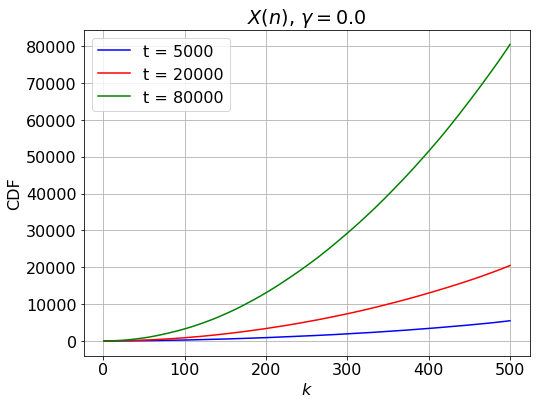

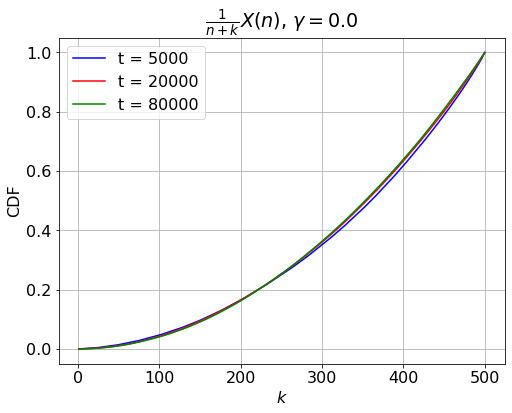

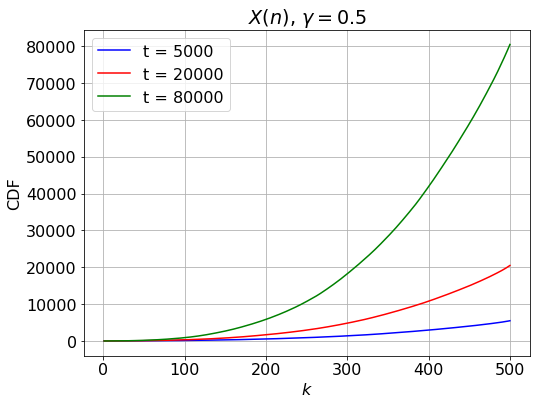

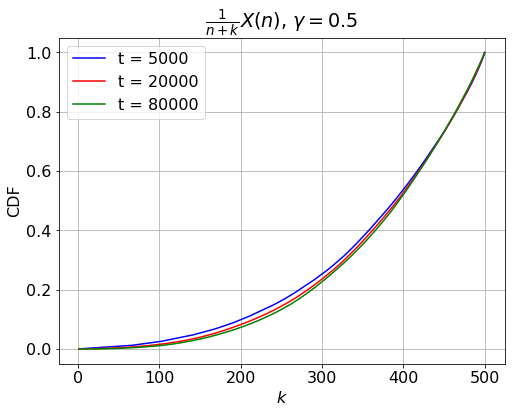

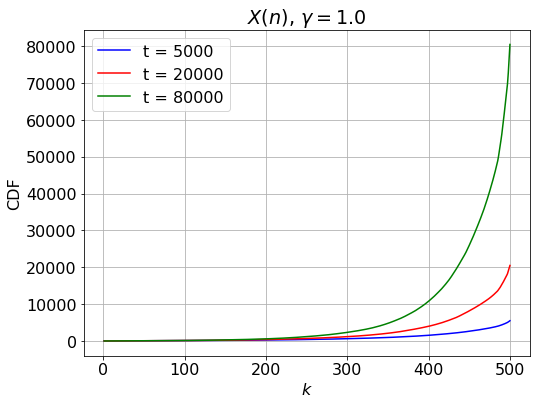

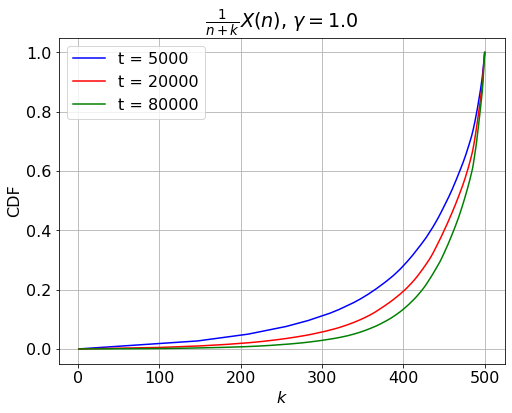

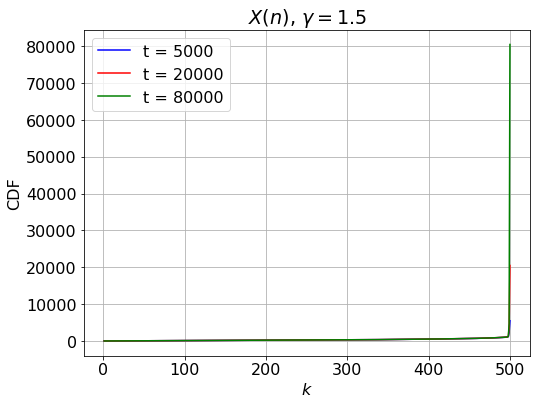

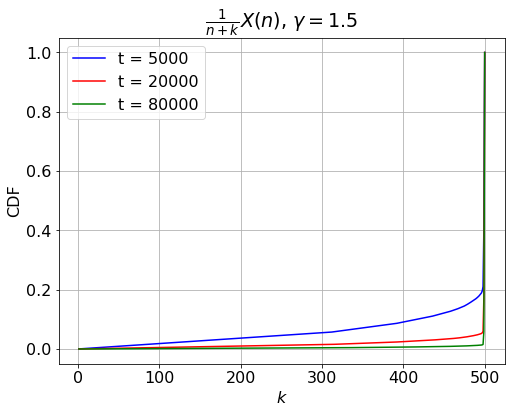

In [159]:
f = np.arange(0.01,10.01,0.02)
#f = np.ones(k)*0.5

for y in gammas:
    X = Polya(k, ts[-1], y, f)
    c = 0
    
    figA, axA = plt.subplots(figsize=(8, 6))
    figB, axB = plt.subplots(figsize=(8, 6))
    
    for T in ts:
        X_sorted = SortINSR(X[:,T])
        CDF_X = np.cumsum(X_sorted)
        
        X_normed = X_sorted/(T + k)
        CDF_Xnormed = np.cumsum(X_normed)
        
        axA.plot(range(1,k+1), CDF_X, plotcols[c], label='t = %d' % T)
        axB.plot(range(1,k+1), CDF_Xnormed, plotcols[c], label='t = %d' % T)
        
        c += 1
    
    # plot aesthetics
    axA.set_xlabel('$k$')
    axA.set_ylabel('CDF')
    axB.set_xlabel('$k$')
    axB.set_ylabel('CDF')
    axA.set_title('$X(n)$, $\gamma = $%.1f' % y)
    axB.set_title('$\\frac{1}{n + k} X(n)$, $\gamma = $%.1f' % y)
    axA.legend(loc = 'upper left')
    axB.legend(loc = 'upper left')
    axA.grid()
    axB.grid()
